In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2.3

## 2.3.1 파이썬으로 말뭉치 전처리하기

In [ ]:
text='You say goodbye and I say hello.'

In [ ]:
text=text.lower()
text=text.replace('.',' .')

In [ ]:
text

'you say goodbye and i say hello .'

In [ ]:
words=text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [ ]:
word_to_id={}
id_to_word={}

for word in words:
  if word not in word_to_id:
    new_id=len(word_to_id)
    word_to_id[word]=new_id
    id_to_word[new_id]=word

In [ ]:
word_to_id

{'.': 6, 'and': 3, 'goodbye': 2, 'hello': 5, 'i': 4, 'say': 1, 'you': 0}

In [ ]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [ ]:
id_to_word[1]

'say'

In [ ]:
word_to_id['hello']

5

In [ ]:
import numpy as np
corpus=[word_to_id[w] for w in words]
corpus=np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [ ]:
def preprocess(text):
  text=text.lower()
  text=text.replace('.',' .')
  words=text.split(' ')
  word_to_id={}
  id_to_word={}

  for word in words:
    if word not in word_to_id:
      new_id=len(word_to_id)
      word_to_id[word]=new_id
      id_to_word[new_id]=word
  
  corpus=np.array([word_to_id[w] for w in words])

  return corpus, word_to_id,id_to_word


In [ ]:
text='You say goodbye and I say hello.'
corpus,word_to_id,id_to_word=preprocess(text)

In [ ]:
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [ ]:
word_to_id

{'.': 6, 'and': 3, 'goodbye': 2, 'hello': 5, 'i': 4, 'say': 1, 'you': 0}

In [ ]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

## 2.3.2 단어의 분산표현(distributional representation)

## 2.3.3 분포 가설

## 2.3.4 동시발생행렬

In [ ]:
!pwd

/content


In [ ]:
%cd /content/drive/MyDrive/Study/NLP/밑딥2/deep-learning-from-scratch-2

/content/drive/MyDrive/Study/NLP/밑딥2/deep-learning-from-scratch-2


In [ ]:
!pwd

/content/drive/MyDrive/Study/NLP/밑딥2/deep-learning-from-scratch-2


In [ ]:
!ls


ch01  ch03  ch05  ch07	common	   dataset			LICENSE.md
ch02  ch04  ch06  ch08	cover.png  equations_and_figures_2.zip	README.md


In [ ]:
from common.util import preprocess
import numpy as np


In [ ]:
text='You say goodbye and I say hello.'
corpus,word_to_id,id_to_word=preprocess(text)

In [ ]:
print(corpus)

[0 1 2 3 4 1 5 6]


In [ ]:
print(id_to_word)

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [ ]:
C=np.array([
            [0,1,0,0,0,0,0],
            [1,0,1,0,1,1,0],
            [0,1,0,1,0,0,0],
            [0,0,1,0,1,0,0],
            [0,1,0,1,0,0,0],
            [0,1,0,0,0,0,1],
            [0,0,0,0,0,0,0],
],dtype=np.int32)

In [ ]:
print(C[0])

[0 1 0 0 0 0 0]


In [ ]:
print(C[4])

[0 1 0 1 0 0 0]


In [ ]:
print(C[word_to_id['goodbye']])

[0 1 0 1 0 0 0]


In [ ]:
def create_co_matrix(corpus,vocab_size,window_size=1):
  corpus_size=len(corpus)
  co_matrix=np.zeros((vocab_size,vocab_size),dtype=np.int32)

  for idx,word_id in enumerate(corpus):
    for i in range(1,window_size+1):
      left_idx=idx-i
      right_idx=idx+i

      if left_idx>=0:
        left_word_id=corpus[left_idx]
        co_matrix[word_id,left_word_id]+=1
      
      if right_idx<corpus_size:
        right_word_id=corpus[right_idx]
        co_matrix[word_id,right_word_id]+=1

  return co_matrix

## 2.3.5 벡터 간 유사도

In [ ]:
def cos_similarity(x,y,eps=1e-8):
  nx=x/(np.sqrt(np.sum(x**2))+eps)
  ny=y/(np.sqrt(np.sum(y**2))+eps)
  return np.dot(nx,ny)

In [ ]:
from common.util import preprocess,create_co_matrix,cos_similarity

text='You say goodbye and I say hello.'
corpus,word_to_id,id_to_word=preprocess(text)
vocab_size=len(word_to_id)
C=create_co_matrix(corpus,vocab_size)

c0=C[word_to_id['you']]
c1=C[word_to_id['i']]
print(cos_similarity(c0,c1))

0.7071067691154799


## 2.3.6 유사 단어의 랭킹 표시

In [ ]:
from common.util import preprocess, create_co_matrix,most_similar

text='You say goodbye and I say hello.'
corpus,word_to_id,id_to_word=preprocess(text)
vocab_size=len(word_to_id)
C=create_co_matrix(corpus,vocab_size)

most_similar('you',word_to_id,id_to_word,C,top=5)


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


# 2.4 통계 기반 기법 개선하기

## 2.4.1 상호정보량

In [3]:
import numpy as np

a=np.random.randn(5,4)
print(a)
print(np.sum(a))
print(np.sum(a,axis=0))

[[ 0.34714552 -0.02261652 -0.78606632  0.08857843]
 [-1.1753262   1.19800297  0.47550569  0.30609656]
 [-0.89789327 -0.08889148 -1.07363069 -0.54356186]
 [-0.20816092  0.04700586  0.29294968 -0.93621346]
 [ 0.06808459 -0.67019155  1.62239861 -0.28198025]]
-2.2387646136199972
[-1.86615028  0.46330927  0.53115697 -1.36708058]


In [ ]:
def ppmi(C,verbose=False,eps=1e-8):
  M=np.zeros_like(C,dtype=np.float32)
  N=np.sum(C)
  S=np.sum(C,axis=0)
  total=C.shape[0]*C.shape[1]
  cnt=0

  for i in range(C.shape[0]):
    for j in range(C.shape[1]):
      pmi=np.log2(C[i,j]*N/(S[j]*S[i])+eps)  # ?
      M[i,j]=max(0,pmi)

      if verbose:
        cnt+=1
        if cnt%(total//100)==0:
          print('%.1f%% 완료' % (100*cnt/total))

  return M

In [ ]:
from common.util import preprocess,create_co_matrix,cos_similarity,ppmi
import numpy as np

text='You say goodbye and I say hello.'
corpus,word_to_id,id_to_word=preprocess(text)
vocab_size=len(word_to_id)
C=create_co_matrix(corpus,vocab_size)
W=ppmi(C)

np.set_printoptions(precision=3)
print('동시발생 행렬')
print(C)
print('-'*50)
print('PPMI')
print(W)

동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


In [ ]:
word_to_id

{'.': 6, 'and': 3, 'goodbye': 2, 'hello': 5, 'i': 4, 'say': 1, 'you': 0}

## 2.4.2 차원감소

## 2.4.3 SVD에 의한 차원 감소

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi

text='You say goodbye and I say hello.'
corpus,word_to_id,id_to_word=preprocess(text)
vocab_size=len(word_to_id)
C=create_co_matrix(corpus,vocab_size,window_size=1)
W=ppmi(C)

# SVD

U,S,V=np.linalg.svd(W)


In [ ]:
print(C[0]) # 동시 발생 행렬

[0 1 0 0 0 0 0]


In [ ]:
print(W[0]) # PPMI 행렬

[0.    1.807 0.    0.    0.    0.    0.   ]


In [ ]:
print(U[0]) # SVD

[-1.110e-16  3.409e-01 -4.163e-16 -1.205e-01 -1.110e-16 -9.323e-01
 -1.086e-16]


In [ ]:
print(U[0,:2])

[-1.110e-16  3.409e-01]


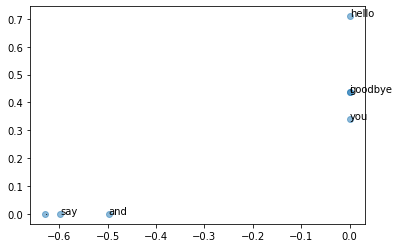

In [ ]:
for word, word_id in word_to_id.items():
  plt.annotate(word,(U[word_id,0],U[word_id,1]))

plt.scatter(U[:,0],U[:,1],alpha=0.5)
plt.show()

## 2.4.4 PTB 데이터셋

In [ ]:
from dataset import ptb

corpus,word_to_id,id_to_word=ptb.load_data('train')

print('말뭉치 크기 :',len(corpus))
print('corpus[:30]',corpus[:30])
print()

print('id_to_word[0] : ',id_to_word[0])
print('id_to_word[1] : ',id_to_word[1])
print('id_to_word[2] : ',id_to_word[2])
print()

print('word_to_id["car"] :' , word_to_id['car'])
print('word_to_id["happy"] :'  , word_to_id['happy'])
print('word_to_id["lexus"] :' , word_to_id['lexus'])

Done
말뭉치 크기 : 929589
corpus[:30] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0] :  aer
id_to_word[1] :  banknote
id_to_word[2] :  berlitz

word_to_id["car"] : 3856
word_to_id["happy"] : 4428
word_to_id["lexus"] : 7426


In [ ]:
import numpy as np
from common.util import most_similar,create_co_matrix,ppmi
from dataset import ptb
from sklearn.utils.extmath import randomized_svd

window_size=2
wordvec_size=100

corpus, word_to_id,id_to_word=ptb.load_data('train')
vocab_size=len(word_to_id)
print('동시발생 수 계산 ...')
C=create_co_matrix(corpus,vocab_size,window_size)
print('PPMI 계산 ...')
W=ppmi(C,verbose=True)


print('SVD 계산 ...')
try:
  # truncated SVD(빠르다)
  U,S,V=randomized_svd(W,n_components=wordvec_size,n_iter=5,random_state=None)
except ImportError:
  # SVD (느리다)
  U,S,V=np.linalg.svd(W)

word_vecs=U[:,:wordvec_size]

querys=['you','year','car','toyota']
for query in querys:
  most_similar(query,word_to_id,id_to_word,word_vecs,top=5)

동시발생 수 계산 ...
PPMI 계산 ...
1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료
100.0% 완료
SVD 계산 ...

[query] you
 i: 0.6612947583198547
 we: 0.6022545099258423
 do: 0.5754